In [1]:
import os
import sys
import glob
import gzip
import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd

import cartopy.feature as cf
import cartopy.crs as ccrs

from matplotlib import patches
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
dir_base = os.path.join('/','media','arturo','Arturo','Data','Brazil','GSMaP')

In [12]:
filename = os.path.join(dir_base,'NOW','raw','2024','01','01','gsmap_now.20240101.0100.dat.gz')

with gzip.open(filename, mode='rb') as handle:
    data_NOW = np.frombuffer(handle.read(), dtype=np.float32).reshape(610, 500)

data_NOW = np.where(data_NOW<0,np.nan,data_NOW)

In [13]:
filename = os.path.join(dir_base,'NRT','raw','2024','01','01','gsmap_nrt.20240101.0100.dat.gz')

with gzip.open(filename, mode='rb') as handle:
    data_NRT = np.frombuffer(handle.read(), dtype=np.float32).reshape(610, 500)

data_NRT = np.where(data_NRT<0,np.nan,data_NRT)

In [14]:
lat = np.arange(-55,6,0.1)
lon = np.arange(-83,-33,0.1)
lon2d, lat2d = np.meshgrid(lon, lat)

/tmp/ipykernel_9494/3502036725.py:13: RuntimeWarning: divide by zero encountered in log
  a1 = ax1.contourf(lon2d, lat2d, np.log(data_NOW[::-1,::]), levels=levels)
/tmp/ipykernel_9494/3502036725.py:35: RuntimeWarning: divide by zero encountered in log
  a1 = ax1.contourf(lon2d, lat2d, np.log(data_NRT[::-1,::]), levels=levels)


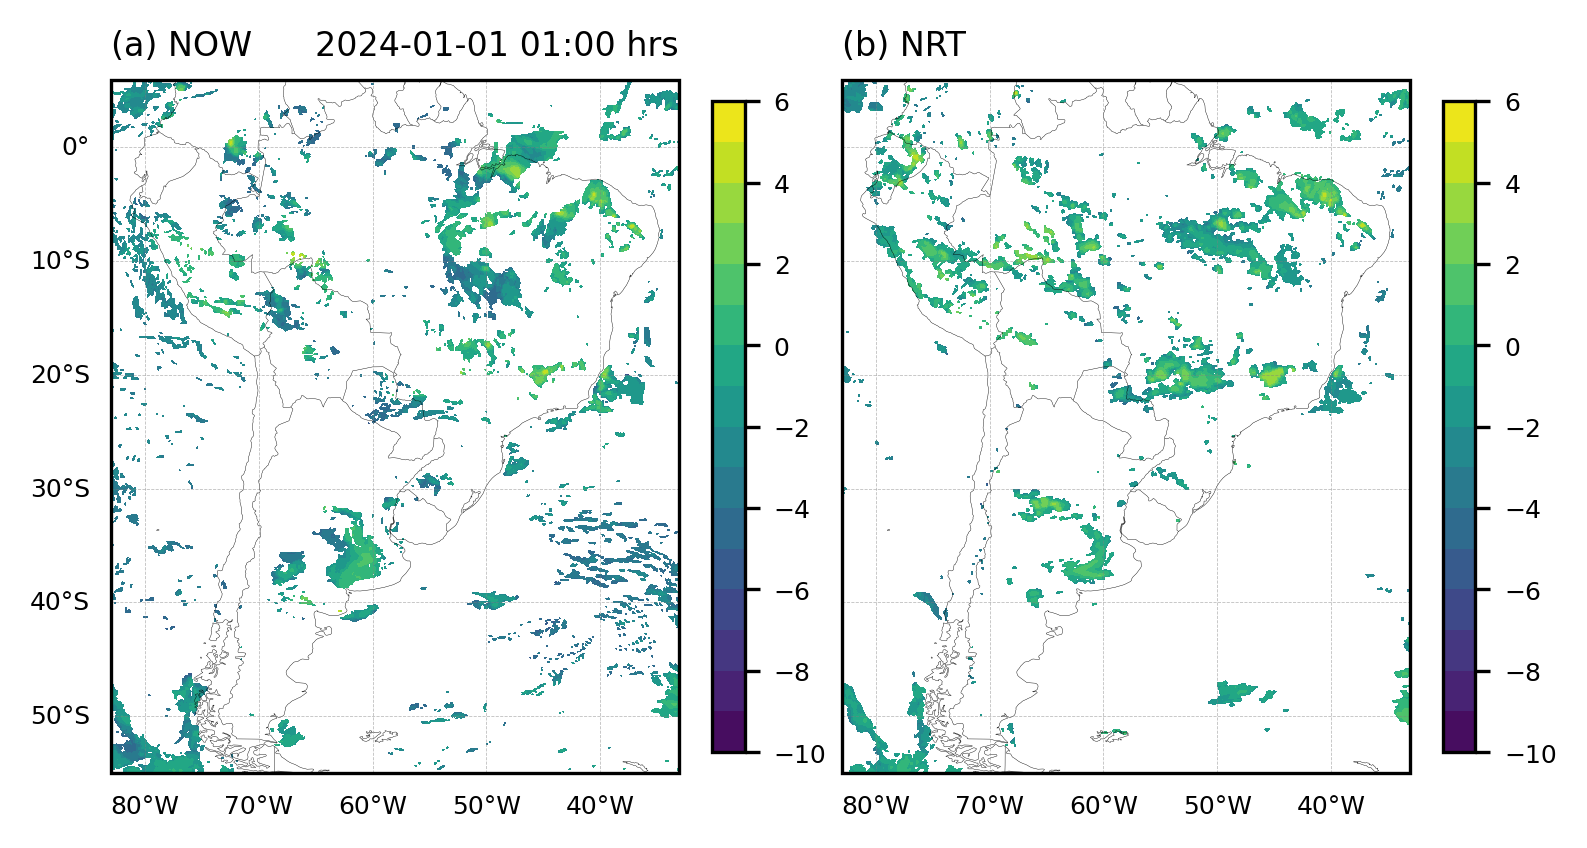

In [16]:
levels = np.arange(-10, 7, 1)

proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(6,3),dpi=300)
gs = gridspec.GridSpec(1,2)

#==================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
# ax1.set_extent([-87,-30,-50,15],crs=proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.1, linestyle='-',edgecolor='k')
ax1.add_feature(cf.BORDERS, linewidth=0.1, linestyle='-', edgecolor='k')

a1 = ax1.contourf(lon2d, lat2d, np.log(data_NOW[::-1,::]), levels=levels)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

cbar = plt.colorbar(a1, orientation='vertical', pad=0.05, fraction=0.049)
cbar.ax.tick_params(labelsize=6)

ax1.set_title('(a) NOW', loc='left', fontsize=8)
ax1.set_title('2024-01-01 01:00 hrs', loc='right', fontsize=8)

#==================================================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
# ax1.set_extent([-87,-30,-50,15],crs=proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.1, linestyle='-',edgecolor='k')
ax1.add_feature(cf.BORDERS, linewidth=0.1, linestyle='-', edgecolor='k')

a1 = ax1.contourf(lon2d, lat2d, np.log(data_NRT[::-1,::]), levels=levels)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

cbar = plt.colorbar(a1, orientation='vertical', pad=0.05, fraction=0.049)
cbar.ax.tick_params(labelsize=6)

ax1.set_title('(b) NRT', loc='left', fontsize=8)

#==================================================================================================
plt.subplots_adjust(wspace=0.1, hspace=0.2)

ax1.set_facecolor('white')
fig.patch.set_alpha(0)